In [2]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import pickle
import scikitplot as skplt
import matplotlib
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import autosklearn.classification
import warnings
from sklearn.cross_validation import train_test_split
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', RuntimeWarning)
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
def label_encode(data,attribute):
    country=LabelEncoder() #data extracted from linkedin consist of only the following country
    country.fit(['armenia', 'austria', 'bali', 'belgium', 'bhutan', 'bulgaria',
       'croatia', 'cyprus', 'czech republic', 'denmark', 'finland',
       'france', 'georgia', 'germany', 'greece', 'hungary', 'india',
       'ireland', 'italy', 'lithuania', 'luxembourg', 'malasya', 'monaco',
       'montenegro', 'netherlands', 'norway', 'philippines', 'poland',
       'portugal', 'russia', 'rwanda', 'scotland', 'serbia', 'slovakia',
       'slovenia', 'spain', 'sri lanka', 'switzerland', 'thailand',
       'turkey', 'uae', 'united kingdom', 'united states'])
    
    size_category=LabelEncoder()#labels of size
    size_category.fit(['Large enterprises', 'small and medium-sized enterprises'])
    
    category=LabelEncoder()#labels of category
    category.fit(['CB', 'CC', 'CH', 'EP', 'H', 'R', 'T', 'TA', 'TB', 'TO', 'WP'])
    
    
    if attribute=="country":
        return country.transform(data["Country"])
    elif attribute=="size":
        return size_category.transform(data["size category"])
    elif attribute=="category":
        return category.transform(data["Category"])
    else:
        print("Invalid argument")
        
def ml_model(dataframe):
    dataframe["country_encoded"]=label_encode(dataframe,"country")
    dataframe["size_category_encoded"]=label_encode(dataframe,"size")
    dataframe["category_encoded"]=label_encode(dataframe,"category")
    df_model=dataframe[["company","country_encoded","category_encoded","size_category_encoded"]]
    feature=df_model.iloc[:,1:3]
    target=df_model.iloc[:,3]
    X_train, X_test, y_train, y_test =train_test_split(feature, target,test_size=0.3,random_state=0)
    automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=1200, #take 20 mins
    include_preprocessors=["no_preprocessing", ])
    automl.fit(X_train,y_train)
    dump_file = 'automl.dump.pkl'
    with open(dump_file, 'wb') as f:
        pickle.dump(automl, f)
    model = pickle.load(open(dump_file, 'rb'))
    print("-------------------------------------------Model Report---------------------------------------------------------")
    print(" Train Size= 70% Test Size= 30% \n")
    print("ROC AUC Score (Train): %f" % (metrics.roc_auc_score(y_train,model.predict(X_train))*100) +"%" )
    print("Training Data Result Visualization")
    print("Reciever Operating Characterstics (training phase)")
    skplt.metrics.plot_roc_curve(y_train,model.predict_proba(X_train))
    plt.show()
    print("Confusion Metrics (training phase) \n")
    skplt.metrics.plot_confusion_matrix(y_train,model.predict(X_train))
    plt.show()
    print("ROC AUC Score (Test): %f" % (metrics.roc_auc_score(y_test,model.predict(X_test))*100) +"%" )
    print("Test Data  Result Visualization")
    print("Reciever Operating Characterstics (testing phase)")
    skplt.metrics.plot_roc_curve(y_test,model.predict_proba(X_test))
    plt.show()
    print("Confusion Metrics (testing phase)")
    skplt.metrics.plot_confusion_matrix(y_test,model.predict(X_test))
    plt.show()

-------------------------------------------Model Report---------------------------------------------------------
 Train Size= 70% Test Size= 30% 

ROC AUC Score (Train): 86.796537%
Training Data Result Visualization
Reciever Operating Characterstics (training phase)


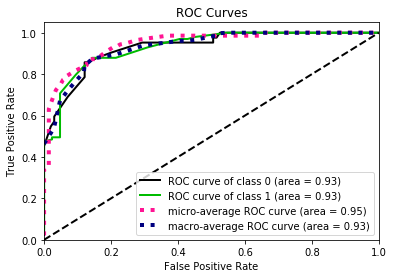

Confusion Metrics (training phase) 



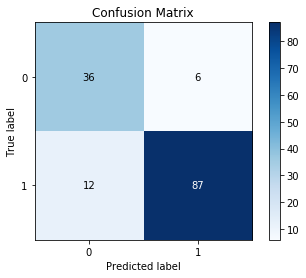

ROC AUC Score (Test): 83.454545%
Test Data  Result Visualization
Reciever Operating Characterstics (testing phase)


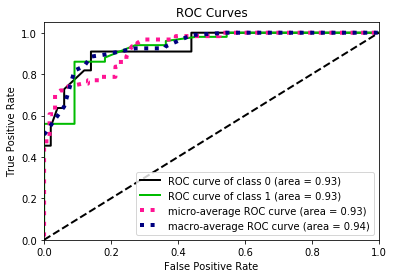

Confusion Metrics (testing phase)


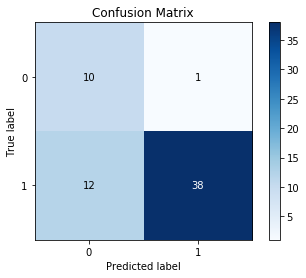

[WARNING] [01:15:49:autosklearn.util.backend] Could not delete output dir: /tmp/autosklearn_output_22085_8141
[WARNING] [01:15:49:autosklearn.util.backend] Could not delete tmp dir: /tmp/autosklearn_tmp_22085_8141


In [4]:
df=pd.read_csv("data_linkedin_scrapped.csv")
ml_model(df)